✅ Librerías cargadas!
🍽️ Dataset: Tips (propinas en restaurante)
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

📊 Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

📈 Estadísticas descriptivas:
       total_bill       

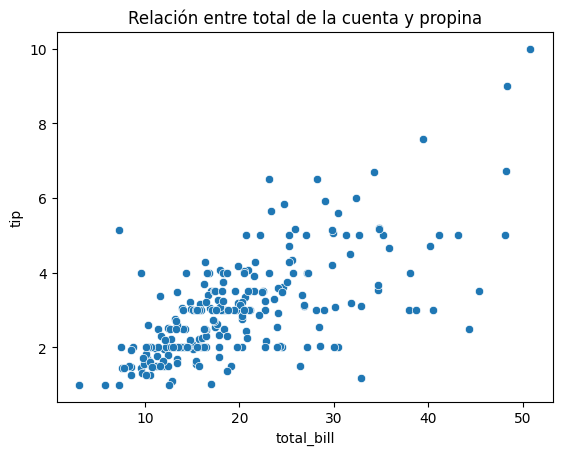

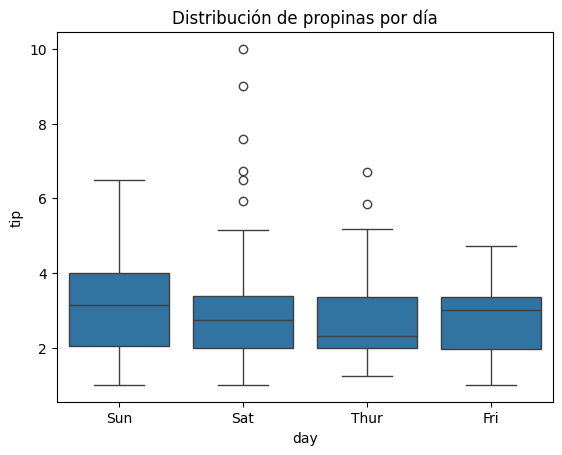


📈 Resultados Regresión Lineal:
   MAE: 0.67
   RMSE: 0.84
   R²: 0.437

📊 Resultados Regresión Logística:
   Accuracy: 0.735
   Precision: 0.609
   Recall: 0.778
   F1-score: 0.683

Matriz de confusión:
[[22  9]
 [ 4 14]]

Reporte de clasificación:
              precision    recall  f1-score   support

Propina Baja       0.85      0.71      0.77        31
Propina Alta       0.61      0.78      0.68        18

    accuracy                           0.73        49
   macro avg       0.73      0.74      0.73        49
weighted avg       0.76      0.73      0.74        49


⚖️ Regularización:
   R² medio (Ridge): 0.423
   R² medio (Lasso): 0.457


In [ ]:
# 🚀 Práctico con Dataset Tips (Seaborn)
# UT1: Machine Learning Clásico | Borrador de Notebook

# === Setup Inicial ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
)

print("✅ Librerías cargadas!")

# === Paso 1: Cargar Dataset Tips ===
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(url)

print("🍽️ Dataset: Tips (propinas en restaurante)")
print(tips.head())
print("\n📊 Información:")
print(tips.info())
print("\n📈 Estadísticas descriptivas:")
print(tips.describe())

# === Paso 2: Exploración básica ===
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.title("Relación entre total de la cuenta y propina")
plt.show()

sns.boxplot(x="day", y="tip", data=tips)
plt.title("Distribución de propinas por día")
plt.show()

# === Paso 3: Regresión Lineal  ===
tips_encoded = pd.get_dummies(tips, drop_first=True)

X = tips_encoded.drop("tip", axis=1)
y = tips_encoded["tip"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

predicciones = modelo_lr.predict(X_test)

mae = mean_absolute_error(y_test, predicciones)
mse = mean_squared_error(y_test, predicciones)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)

print("\n📈 Resultados Regresión Lineal:")
print(f"   MAE: {mae:.2f}")
print(f"   RMSE: {rmse:.2f}")
print(f"   R²: {r2:.3f}")

# === Paso 4: Clasificación (propina alta/baja) ===
# Definir variable binaria: 1 si propina > mediana, 0 en caso contrario
mediana_tip = tips["tip"].median()
y_class = (tips["tip"] > mediana_tip).astype(int)

X_class = tips_encoded.drop("tip", axis=1)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

modelo_log = LogisticRegression(max_iter=5000, random_state=42)
modelo_log.fit(X_train_c, y_train_c)

pred_class = modelo_log.predict(X_test_c)

acc = accuracy_score(y_test_c, pred_class)
prec = precision_score(y_test_c, pred_class)
rec = recall_score(y_test_c, pred_class)
f1 = f1_score(y_test_c, pred_class)

print("\n📊 Resultados Regresión Logística:")
print(f"   Accuracy: {acc:.3f}")
print(f"   Precision: {prec:.3f}")
print(f"   Recall: {rec:.3f}")
print(f"   F1-score: {f1:.3f}")

print("\nMatriz de confusión:")
print(confusion_matrix(y_test_c, pred_class))
print("\nReporte de clasificación:")
print(classification_report(y_test_c, pred_class, target_names=["Propina Baja", "Propina Alta"]))

# === Paso 5: Regularización (opcional) ===
modelo_ridge = Ridge(alpha=1.0)
scores_ridge = cross_val_score(modelo_ridge, X, y, cv=5, scoring="r2")

modelo_lasso = Lasso(alpha=0.1)
scores_lasso = cross_val_score(modelo_lasso, X, y, cv=5, scoring="r2")

print("\n⚖️ Regularización:")
print(f"   R² medio (Ridge): {scores_ridge.mean():.3f}")
print(f"   R² medio (Lasso): {scores_lasso.mean():.3f}")


